# Global

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import scipy.optimize as opt
import os, sys

In [5]:
FIGURE_WIDTH_1COL = 3.404  
FIGURE_WIDTH_2COL = 7.057 
FIGURE_HEIGHT_1COL_GR = FIGURE_WIDTH_1COL*2/(1 + np.sqrt(5))
FIGURE_HEIGHT_2COL_GR = FIGURE_WIDTH_2COL*2/(1 + np.sqrt(5))
plt.rcdefaults()
font_size = 6 
plt.rcParams.update({
    'font.size'             : font_size,
    'font.family'           :'sans-serif',
    # 'figure.facecolor'        : '0.9',
    'figure.titlesize'      : 'medium',
    'figure.dpi'            : 300,
    'figure.figsize'        : (FIGURE_WIDTH_1COL, FIGURE_HEIGHT_1COL_GR),
    'axes.titlesize'        : 'medium',
    'axes.axisbelow'        : True,
    'xtick.direction'       : 'in',
    'xtick.labelsize'       : 'small',
    'ytick.direction'       : 'in',
    'ytick.labelsize'       : 'small',
    'image.interpolation'   : 'none',
    'legend.fontsize'       : font_size,
    'axes.labelsize'        : font_size,
    'axes.titlesize'        : font_size,
    'xtick.labelsize'       : font_size,
    'ytick.labelsize'       : font_size,
})

# Load data

In [10]:
results_df = pd.read_csv('/Users/chrysanderhagen/My Drive/ETH_Zurich/Studieren/2024FS/Sonstiges/ethz_qhack_24/Chrysander/classical_results.csv')
results_df['cut_ratio'] = results_df['cost_qaoa'] / results_df['cost_gurobi']
results_df.loc[8, 'nodes'] = 20
results_df.loc[8, 'runtime'] = 13109 - sum(results_df['runtime'][:8])
results_df.loc[8, 'cut_ratio'] = 1.0
display(results_df)
results_df.to_csv('/Users/chrysanderhagen/My Drive/ETH_Zurich/Studieren/2024FS/Sonstiges/ethz_qhack_24/Chrysander/CPU_results.csv', index=False)

,nodes,runtime,partition_gurobi,partition_qaoa,cost_gurobi,cost_qaoa,cut_ratio
0,4.0,0.132558,"[{1, 3}, {0, 2}]","({0, 2}, {1, 3})",4.0,4.0,1.0
1,6.0,0.189017,"[{0, 4, 5}, {1, 2, 3}]","({1, 2, 3}, {0, 4, 5})",7.0,7.0,1.0
2,8.0,1.329807,"[{0, 3, 4, 7}, {1, 2, 5, 6}]","({1, 3, 5, 6}, {0, 2, 4, 7})",10.0,10.0,1.0
3,10.0,1.088352,"[{0, 1, 2, 4, 7}, {3, 5, 6, 8, 9}]","({3, 5, 6, 8, 9}, {0, 1, 2, 4, 7})",13.0,13.0,1.0
4,12.0,17.104670,"[{1, 3, 4, 8, 9, 10}, {0, 2, 5, 6, 7, 11}]","({0, 2, 5, 6, 7, 11}, {1, 3, 4, 8, 9, 10})",16.0,16.0,1.0
5,14.0,37.341774,"[{0, 1, 5, 8, 9, 12, 13}, {2, 3, 4, 6, 7, 10, ...","({0, 3, 5, 8, 9, 12, 13}, {1, 2, 4, 6, 7, 10, ...",17.0,17.0,1.0
6,16.0,80.178404,"[{3, 5, 8, 9, 10, 11, 12, 14}, {0, 1, 2, 4, 6,...","({3, 5, 8, 9, 10, 11, 12, 14}, {0, 1, 2, 4, 6,...",22.0,22.0,1.0
7,18.0,353.652971,"[{2, 5, 6, 8, 9, 10, 11, 13}, {0, 1, 3, 4, 7, ...","({0, 1, 3, 4, 7, 12, 14, 15, 16, 17}, {2, 5, 6...",24.0,24.0,1.0
8,20.0,12617.982447,NaN,NaN,NaN,NaN,1.0


# CPU ratio data

(0.0, 1.1)

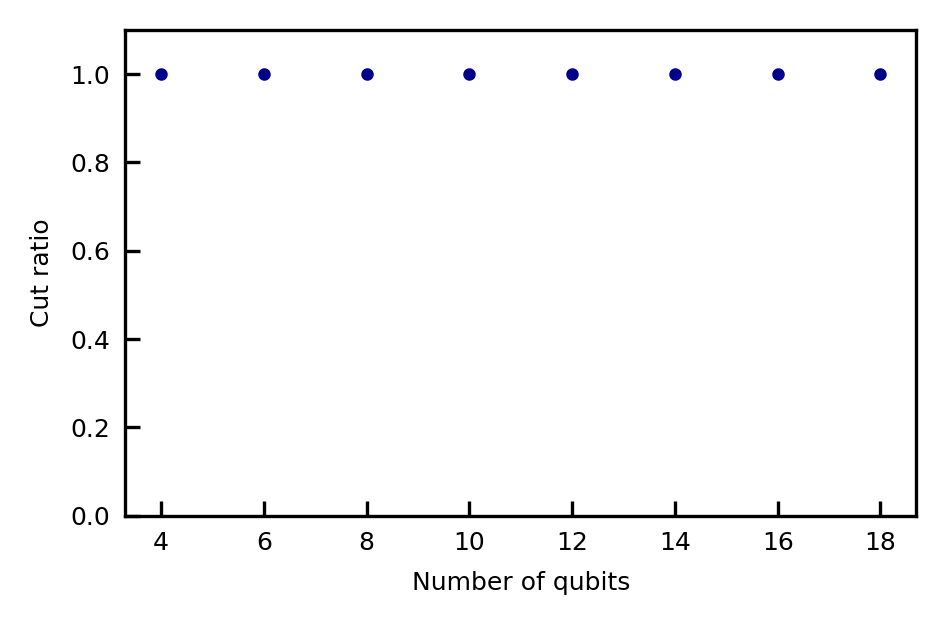

In [12]:
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH_1COL, FIGURE_HEIGHT_1COL_GR))
ax.scatter(results_df['nodes'], results_df['cut_ratio'], s=4, label='Cut ratio', color='darkblue')
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Cut ratio')
ax.set_ylim(0, 1.1)

# CPU runtime data

In [16]:
def exponential(x, a, b):
    return a * np.exp(b * x)

popt, pcov = opt.curve_fit(exponential, results_df['nodes'], results_df['runtime'])

Text(0, 0.5, 'Runtime [s]')

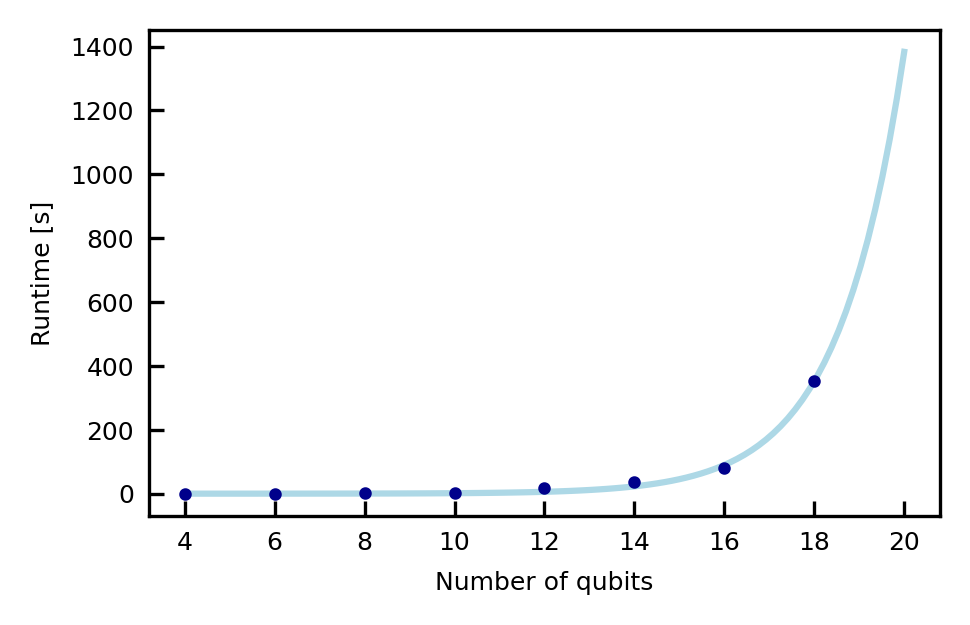

In [19]:
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH_1COL, FIGURE_HEIGHT_1COL_GR))
ax.scatter(results_df['nodes'], results_df['runtime'], label='CPU', s=4, color='darkblue', zorder=2)
ax.plot(np.linspace(4, 20, 100), exponential(np.linspace(4, 20, 100), *popt), color='lightblue', label='Exponential fit', zorder=0)
# ax.scatter(results_df['nodes'], results_df['runtime_gpu'], label='GPU', color='darkorange')
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Runtime [s]')